In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader
import numpy as np

In [2]:
SHANNON_EXTENT = [-9, -7, 52.5, 54.25]

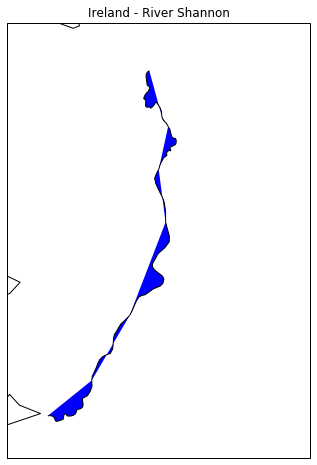

In [3]:
rivers_file = shapereader.natural_earth(
    resolution = '10m',
    category = 'physical',
    name = 'rivers_lake_centerlines_scale_rank'
)

rivers_shp = shapereader.Reader(rivers_file)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.epsg(29902))
ax.set_title("Ireland - River Shannon")

for rec in rivers_shp.records():
    if rec.attributes['name'] == 'Shannon':
        ax.add_geometries([rec.geometry], ccrs.PlateCarree(), edgecolor='black', facecolor='blue')
    pass

ax.coastlines(resolution='50m')
ax.set_extent(SHANNON_EXTENT)


## Extracting coordiantes of the river

In [4]:
shannon_cords = []

for rec in rivers_shp.records():
    if rec.attributes['name'] == 'Shannon':
        for linestring in rec.geometry:
            for coords in linestring.coords:
                shannon_cords.append(coords)
    pass

In [5]:
boundary = np.array(shannon_cords)

In [7]:
boundary

143